# I. 텍스트 전처리 - 정규화
텍스트 자체를 바로 피처로 만들 수는 없다. 텍스트를 가공하기 위한 클렌징, 토큰화, 어근화 등이 필요.
정규화 작업의 종류는 다음과 같음
- 클렌징: 불필요한 문자,기호 등을 사전제거 (정규표현식 주로 활용)
- 토큰화
- 필터링/스톱 워드 제거/철자 수정
- Stemming
- Lemmatization

### (1) 문장 토큰화: 문장끼리 나누기
문장 토큰화(sentence tokenization)는 문장의 마침표, 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적임   
punkt는 마침표, 개행 문자 등의 데이터 세트를 다운로드 받는다.   

In [ ]:
from nltk import sent_tokenize
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myeon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
text_sample = "The Matrix is everywhere its all around us, here even in this wroom. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes."

sentences = sent_tokenize(text = text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this wroom.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


### (2) 단어 토큰화
단어 토큰화(Word Tokenization)는 문장을 단어로 토큰화하는 것을 말하며,    
기본적으로 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리하지만,    
정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있다.   
단어의 순서가 중요하지 않은 경우에는 Bag of Word를 사용해도 된다.   

In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [ ]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수
def tokenize_text(text):

  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)

  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'wroom', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


## IV. 텍스트 전처리 - 스톱 워드(불용어) 제거
의미가 없는 be동사 등을 제거 할 때 사용함   
이런 단어들은 매우 자주 나타나는 특징이 있음   
NTLK의 스톱 워드에 기본적인 세팅이 저장되어 있음   

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myeon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
print("영어 stop words 개수:", len(nltk.corpus.stopwords.words("english")))
print(nltk.corpus.stopwords.words("english")[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")
all_tokens = []

# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 불용어 제거하는 반복문 작성
for sentence in word_tokens:
  filtered_words = [] # 빈 리스트 생성

  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드 제거
  for word in sentence:

    # 소문자로 모두 변환
    word = word.lower()

    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)
  
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'wroom', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


## V. 텍스트 전처리 - 어간(Stemming) 및 표제어(Lemmatization)
동사의 변화 예) Love, Loved, Loving   
어근 및 표제어는 단어의 원형을 찾는 것.   
그런데, 표제어 추출(Lemmatization)이 어근(Stemming)보다는 보다 더 의미론적인 기반에서 단어의 원형을 찾는다.   

### (1) 어간(Stemming)
Stemming은 원형 단어로 변환 시, 어미를 제거하는 방식을 사용한다.   
예) worked에서 ed를 제거하는 방식을 사용   
Stemming기법에는 크게 Porter, Lancaster, Snowball Stemmer가 있음.   

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()

word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


In [ ]:
print("For Lancaster:", lancaster.stem("destabilized")) #지나치게 잘라버리는 경향
print("For Porter:", porter.stem("destabilized"))

For Lancaster: dest
For Porter: destabil


## (2) 표제어 추출(Lemmatization)
표제어 추출은 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안하여 정확한 철자로 된 어근 단어를 찾아준다.   
어근을 보통 Lemma라고 부르며, 이 때의 어근은 Canoical Form, Dictionary Form, Citation Form 이라고 부른다.   
간단하게 예를 들면, loves, loving, loved는 모두 love에서 파생된 것이며, 이 때 love는 Lemma라고 부른다.   

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\myeon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [ ]:
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'v'), lemma.lemmatize('happiest', 'v'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

amuse amuse amuse
happier happiest
fancy fancy


In [ ]:
# 이번에는 조금 긴 문장을 활용하여 작성하도록 한다.
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;" # 해당되는 부호는 제외하는 코드를 만든다. 
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

Word                Lemma               
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
He                  He                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
Sun                 Sun                 


### 예제1. 모의고사 1회 3번 문제

Q1) ‘영화 기생충_review.txt’ 데이터를 읽어온 뒤 숫자, 특수 문자 등을    
제거하는 전처리 작업을 시행하시오. 그리고 ‘영화 기생충_review.txt’을 사전에 등록하라.

In [ ]:
import pandas as pd
review_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\영화 기생충_review.txt', header=None, sep='\n', 
                      encoding='cp949', engine='python')
review_df

,0
0,별1개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
3,지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음. Bomb!!!
4,대단한 영화. 몰입력 장난아님. 후아
...,...
1785,봉송진리ㅋㅋ
1786,와 내 앞으로도 4명이나 있네 ;;
1787,좌파폭도고발영화.전라도까는 내용이었어.
1788,언제나 기대되는 봉준호감독의 영화!!!


In [ ]:
dict_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\영화 기생충_사전.txt', header=None, sep='\n', 
                      encoding='cp949', engine='python')
dict_df

,0
0,기생충
1,봉준호
2,송강호
3,기택
4,이선균
5,박사장
6,조여정
7,연교
8,최우식
9,기우


In [ ]:
# 1, 대소문자 변환
print(review_df[0][3].upper())
print(review_df[0][3].lower())

지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  BOMB!!!
지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  bomb!!!


In [ ]:
for i in range(review_df.shape[0]):
    review_df[0][i]=review_df[0][i].lower()

In [ ]:
review_df.head()

,0
0,별1개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
3,지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음. bomb!!!
4,대단한 영화. 몰입력 장난아님. 후아


In [ ]:
# 2. 숫자 제거
import re
input_str = 'Box A contains 3 red and 5 white balls, while Box B contains 4 red and 2 blue balls.'
result = re.sub(r'\d+', '', input_str)
print(result)

Box A contains  red and  white balls, while Box B contains  red and  blue balls.


In [ ]:
for i in range(review_df.shape[0]):
    review_df[0][i]=re.sub(r'\d+', '', review_df[0][i])

In [ ]:
review_df

,0
0,별개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
3,지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음. bomb!!!
4,대단한 영화. 몰입력 장난아님. 후아
...,...
1785,봉송진리ㅋㅋ
1786,와 내 앞으로도 명이나 있네 ;;
1787,좌파폭도고발영화.전라도까는 내용이었어.
1788,언제나 기대되는 봉준호감독의 영화!!!


In [ ]:
# 3. 특수문자 제거
import string
input_str = 'This &is [an] example? {of} string. with.? punctuation!!!!' # Sample string
result = input_str.translate(str.maketrans('','', string.punctuation))
print(result)

This is an example of string with punctuation


In [ ]:
for i in range(review_df.shape[0]):
    review_df[0][i]=review_df[0][i].translate(str.maketrans('','', string.punctuation))

In [ ]:
review_df.head()

,0
0,별개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다
3,지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음 bomb
4,대단한 영화 몰입력 장난아님 후아


In [ ]:
#4. 공백 제거(문장 시작, 문장 뒤)
input_str = ' a string example '
input_str = input_str.strip()
input_str

'a string example'

In [ ]:
for i in range(review_df.shape[0]):
    review_df[0][i]=review_df[0][i].strip()

In [ ]:
review_df.head()

,0
0,별개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다
3,지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음 bomb
4,대단한 영화 몰입력 장난아님 후아


사전에 등록하는 것을 모르겠다. 뭘 하라는 것인지?

Q2) ‘영화 기생충_사전.txt’를 단어 사전으로 하는 TDM을 구축하고 빈도를 파악하고 시각화하라.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
tdm = cv.fit_transform(review_df[0])

In [ ]:
tdm

<1790x6832 sparse matrix of type '<class 'numpy.int64'>'
	with 10951 stored elements in Compressed Sparse Row format>

In [ ]:
# 단어 목록 확인하기
cv.get_feature_names()[:50]

# 빈도수 확인하기
tdm.sum(axis=0)

# DataFrame 형태로 만들어주기
word_count=pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [ ]:
word_count.sort_values('빈도', ascending=False).head(20)

,단어,빈도
4349,영화,190
2737,봉준호,78
1157,너무,65
4287,역시,41
4370,영화는,38
4206,없는,37
2556,보고,36
4384,영화를,35
5495,정말,33
5055,있는,32


<BarContainer object of 10 artists>

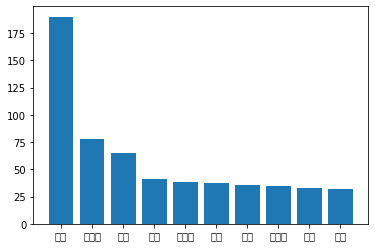

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.bar(word_count.sort_values('빈도', ascending=False)['단어'].head(10), word_count.sort_values('빈도', ascending=False)['빈도'].head(10))

실전에서 시간이 좀 있으면, x축, y축 등등 좀 꾸미는 것이 좋겠다.

Q3) extraNoun으로 명사를 추출하여 워드클라우드를 그리고 특성을 파악하시오.

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

text = "파이썬 워드클라우드 파이썬 좋아 워드클라우드 파이썬 라이브러리 좋아 파이썬 워드클라우드 예시 워드클라우드 우한 폐렴 조심 데이터 분석 우한 워드클라우드 중국 박쥐 감염 코로나바이러스"
wordcloud = WordCloud(background_color='white').generate(text)

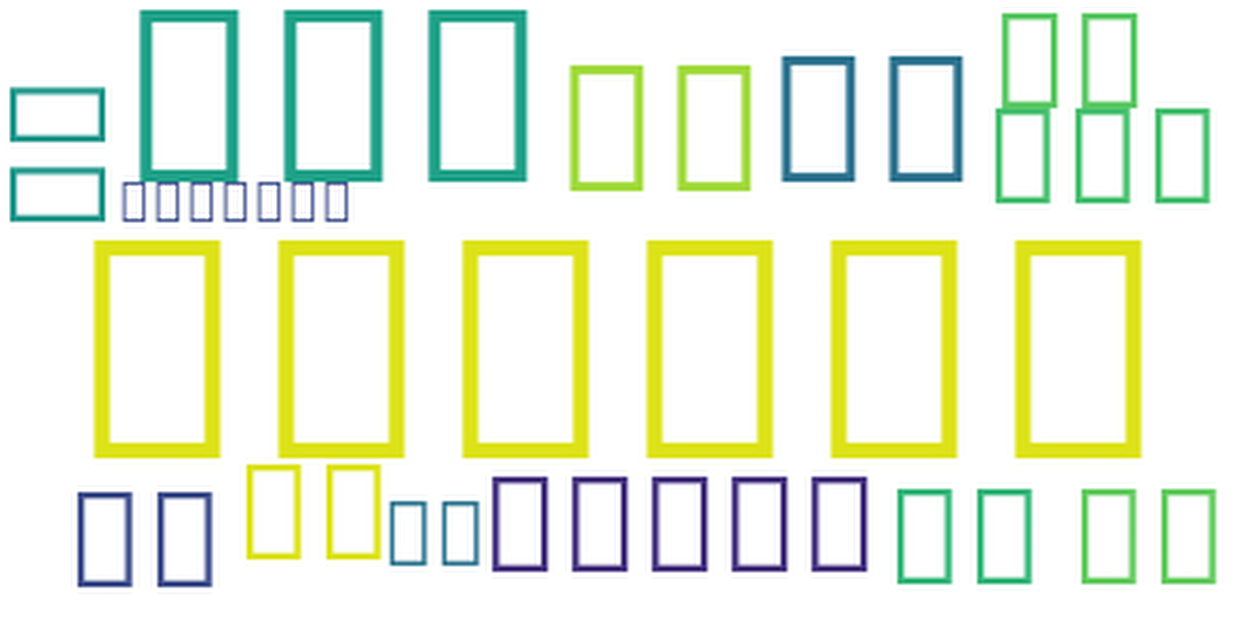

In [ ]:
plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 